# 1. pip install library 

In [1]:
import cv2
import numpy as np 
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp  
from torchsummary import summary


In [2]:
import torch

# Kiểm tra CUDA có khả dụng hay không
if torch.cuda.is_available():
    print("CUDA is available!")
    # Kiểm tra thiết bị đang sử dụng
    print(f"Device name: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("CUDA is not available.")


CUDA is available!
Device name: NVIDIA GeForce RTX 4050 Laptop GPU


# 2. keypoints using mp holistic

In [3]:
mp_holistic = mp.solutions.holistic  # holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion 
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [7]:
mp_drawing.draw_landmarks

<function mediapipe.python.solutions.drawing_utils.draw_landmarks(image: numpy.ndarray, landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList, connections: Optional[List[Tuple[int, int]]] = None, landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2), connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2), is_drawing_landmarks: bool = True)>

In [8]:
cap = cv2.VideoCapture(0)
#set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5 ) as holistic:
    while cap.isOpened():
        #read feed
        ret, frame = cap.read()
        #make detection
        image, results = mediapipe_detection(frame, holistic)
        #draw landmarks
        draw_styled_landmarks(image, results)
        #show to screen
        cv2.imshow("Opencv Feed",image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

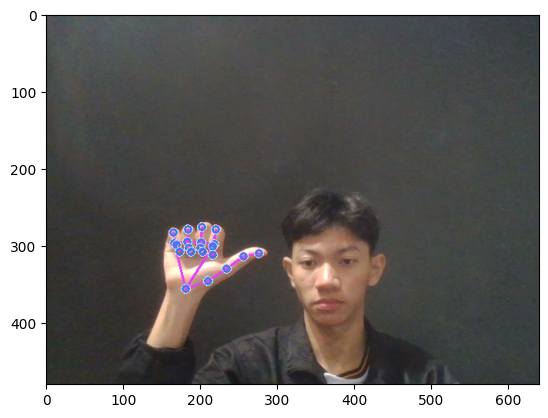

In [9]:
draw_landmarks(frame, results)
draw_styled_landmarks(image, results)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [11]:
len(results.face_landmarks.landmark)

468

In [12]:
results.face_landmarks.landmark

[x: 0.514729142
y: 0.838433266
z: -0.0188267641
, x: 0.515484869
y: 0.80365634
z: -0.0432127
, x: 0.515379786
y: 0.812314153
z: -0.0203745775
, x: 0.509636581
y: 0.763052046
z: -0.0357911512
, x: 0.515793
y: 0.792287767
z: -0.0470398515
, x: 0.516332626
y: 0.775982916
z: -0.0451571122
, x: 0.517854571
y: 0.734453142
z: -0.0273427796
, x: 0.459081352
y: 0.721671
z: 0.00574045721
, x: 0.518808782
y: 0.704054534
z: -0.0251997504
, x: 0.519268453
y: 0.68828392
z: -0.0290496331
, x: 0.520972252
y: 0.626340747
z: -0.0268191267
, x: 0.514557481
y: 0.844329834
z: -0.0171594303
, x: 0.514501154
y: 0.848719418
z: -0.0137711242
, x: 0.514562249
y: 0.850355327
z: -0.00966996048
, x: 0.514391243
y: 0.853702247
z: -0.00719374884
, x: 0.514223874
y: 0.859436393
z: -0.00795604289
, x: 0.514031291
y: 0.86625731
z: -0.0087466687
, x: 0.513894558
y: 0.872576356
z: -0.00634798454
, x: 0.51381278
y: 0.878814757
z: 0.00350401155
, x: 0.51537019
y: 0.808598876
z: -0.0384199359
, x: 0.507704914
y: 0.806097686

In [13]:
len(results.right_hand_landmarks.landmark)

21

# 3. Extract Keypoint Values

In [14]:
len(results.right_hand_landmarks.landmark)

21

In [15]:
# right hand
right_hand = []
if results.right_hand_landmarks:
    for res in results.right_hand_landmarks.landmark:
            test = np.array([res.x,res.y,res.z])
            right_hand.append(test)
            print(right_hand)
    right_hand = np.array(right_hand).flatten()      
else:
      right_hand = np.zeros(21*3)  

print(right_hand)

[array([2.97182739e-01, 7.12325990e-01, 4.43754374e-07])]
[array([2.97182739e-01, 7.12325990e-01, 4.43754374e-07]), array([ 0.34496567,  0.68144196, -0.02299067])]
[array([2.97182739e-01, 7.12325990e-01, 4.43754374e-07]), array([ 0.34496567,  0.68144196, -0.02299067]), array([ 0.38253796,  0.62349546, -0.03264052])]
[array([2.97182739e-01, 7.12325990e-01, 4.43754374e-07]), array([ 0.34496567,  0.68144196, -0.02299067]), array([ 0.38253796,  0.62349546, -0.03264052]), array([ 0.4053112 ,  0.5677107 , -0.04048228])]
[array([2.97182739e-01, 7.12325990e-01, 4.43754374e-07]), array([ 0.34496567,  0.68144196, -0.02299067]), array([ 0.38253796,  0.62349546, -0.03264052]), array([ 0.4053112 ,  0.5677107 , -0.04048228]), array([ 0.42715675,  0.52543586, -0.04811806])]
[array([2.97182739e-01, 7.12325990e-01, 4.43754374e-07]), array([ 0.34496567,  0.68144196, -0.02299067]), array([ 0.38253796,  0.62349546, -0.03264052]), array([ 0.4053112 ,  0.5677107 , -0.04048228]), array([ 0.42715675,  0.52543

In [8]:
def extract_keypoints(results):
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([rh])

In [17]:
results_test = extract_keypoints(results)

In [18]:
results_test

array([ 2.97182739e-01,  7.12325990e-01,  4.43754374e-07,  3.44965667e-01,
        6.81441963e-01, -2.29906701e-02,  3.82537961e-01,  6.23495460e-01,
       -3.26405205e-02,  4.05311197e-01,  5.67710698e-01, -4.04822789e-02,
        4.27156746e-01,  5.25435865e-01, -4.81180586e-02,  3.49527299e-01,
        5.42590380e-01, -1.85296517e-02,  3.74183953e-01,  4.75956649e-01,
       -3.58326696e-02,  3.89571309e-01,  4.33502674e-01, -4.95386608e-02,
        4.02912259e-01,  3.97000849e-01, -5.91914393e-02,  3.18953991e-01,
        5.30770540e-01, -1.85077731e-02,  3.33691806e-01,  4.55496907e-01,
       -3.37840058e-02,  3.47345710e-01,  4.07977730e-01, -4.58139777e-02,
        3.59398425e-01,  3.68584275e-01, -5.42224832e-02,  2.88746566e-01,
        5.36438048e-01, -2.18962003e-02,  2.88059950e-01,  4.61172044e-01,
       -3.81798781e-02,  2.92034656e-01,  4.12697017e-01, -4.94664907e-02,
        2.98283130e-01,  3.70752275e-01, -5.68977632e-02,  2.58988202e-01,
        5.57059526e-01, -

In [ ]:
np.save('0',results_test)

# 4. Setup Folders for Collection

In [9]:
# Path for exported data, numpy arrays
DATA_TRAIN_PATH = os.path.join("MP_Data_Train") 

# Path for video
VIDEO_TRAIN_PATH = os.path.join("MP_Video_Train")

# Actions that we try to detect
actions = np.array([ "aw","ee","ow","sac", "hoi","nang","nothing","aa","oo","uw", "nga","huyen" ])
actions_train = np.array([ "aw","ee","ow","sac", "hoi","nang","nothing","aa","oo","uw", "nga","huyen" ])
#actions_train = np.array([ "aw","ee"])
#actions_train = np.array([ "sac" ])
#actions_train = np.array([ "hoi","nang","nothing"])
#"aw","ee","ow","sac", "hoi","nang","nothing" 
# Thirty videos worth of data# 5. Collect Keypoint Values for Training and Testing
no_sequences_train = 170

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [38]:
# Path for exported data, numpy arrays
DATA_TRAIN_PATH = os.path.join("MP_Data_Train") 

# Path for video
VIDEO_TRAIN_PATH = os.path.join("MP_Video_Train")

# Actions that we try to detect
actions = np.array(["ow","aa","oo" ])
actions_train = np.array(["ow","aa","oo"])
#actions_train = np.array([ "aw","ee"])
#actions_train = np.array([ "sac" ])
#actions_train = np.array([ "hoi","nang","nothing"])
#"aw","ee","ow","sac", "hoi","nang","nothing" 
# Thirty videos worth of data# 5. Collect Keypoint Values for Training and Testing
no_sequences_train = 170

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [35]:
for action in actions : 
    for sequence in range(no_sequences_train):
        try:
            os.makedirs(os.path.join(DATA_TRAIN_PATH, action, str(sequence)))
            os.makedirs(os.path.join(VIDEO_TRAIN_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [39]:
import cv2
import os
import numpy as np
import mediapipe as mp

# Initialize Mediapipe
mp_holistic = mp.solutions.holistic

# Initialize camera
cap = cv2.VideoCapture(0)
w = int(cap.get(3))
h = int(cap.get(4))

# Check if the camera opened successfully
if not cap.isOpened():
    print("Cannot open camera.")
    exit()

# Video file format
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in actions_train:
        for sequence in range(start_folder, start_folder + no_sequences_train):
            # Path to save the video
            wv_path = os.path.join(VIDEO_TRAIN_PATH, action, str(sequence), '{}.mp4'.format(str(sequence)))
            VDWT = cv2.VideoWriter(wv_path, fourcc, 30, (w, h))

            if not VDWT.isOpened():
                print(f"Error opening VideoWriter: {wv_path}")
                continue

            print(f"Press 'q' to start recording: {wv_path}")
            
            # Wait for user to press 'q' before starting
            while True:
                ret, frame = cap.read()
                if not ret:
                    print("Error reading camera.")
                    break
                
                cv2.putText(frame, f"Recording action: {action}, video {sequence}", (15, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', frame)
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            
            print(f"Recording {wv_path}...")
            
            # Start recording
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                if not ret:
                    print("Error reading camera.")
                    break
                
                # Process with Mediapipe
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                
                # Display action and video number on screen
                
                # Display frame count
                cv2.putText(image, f"Frame: {frame_num+1}/{sequence_length}", (15, 60),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
                
                # Save keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_TRAIN_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Write to video
                VDWT.write(frame)
                
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(10)  # No early exit with 'q'
            
            print(f"Recording completed: {wv_path}")
            VDWT.release()
            print(f"Video saved: {wv_path}")

    cap.release()
    cv2.destroyAllWindows()

Press 'q' to start recording: MP_Video_Train\ow\0\0.mp4
Recording MP_Video_Train\ow\0\0.mp4...
Recording completed: MP_Video_Train\ow\0\0.mp4
Video saved: MP_Video_Train\ow\0\0.mp4
Press 'q' to start recording: MP_Video_Train\ow\1\1.mp4
Recording MP_Video_Train\ow\1\1.mp4...
Recording completed: MP_Video_Train\ow\1\1.mp4
Video saved: MP_Video_Train\ow\1\1.mp4
Press 'q' to start recording: MP_Video_Train\ow\2\2.mp4
Recording MP_Video_Train\ow\2\2.mp4...
Recording completed: MP_Video_Train\ow\2\2.mp4
Video saved: MP_Video_Train\ow\2\2.mp4
Press 'q' to start recording: MP_Video_Train\ow\3\3.mp4
Recording MP_Video_Train\ow\3\3.mp4...
Recording completed: MP_Video_Train\ow\3\3.mp4
Video saved: MP_Video_Train\ow\3\3.mp4
Press 'q' to start recording: MP_Video_Train\ow\4\4.mp4
Recording MP_Video_Train\ow\4\4.mp4...
Recording completed: MP_Video_Train\ow\4\4.mp4
Video saved: MP_Video_Train\ow\4\4.mp4
Press 'q' to start recording: MP_Video_Train\ow\5\5.mp4
Recording MP_Video_Train\ow\5\5.mp4...


In [37]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions_train)}

In [12]:
label_map

{'aw': 0,
 'ee': 1,
 'ow': 2,
 'sac': 3,
 'hoi': 4,
 'nang': 5,
 'nothing': 6,
 'aa': 7,
 'oo': 8,
 'uw': 9,
 'nga': 10,
 'huyen': 11}

In [23]:
sequences_train, labels_train = [], []
for action in actions_train:
    for sequence in np.array(os.listdir(os.path.join(DATA_TRAIN_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_TRAIN_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences_train.append(window)
        labels_train.append(label_map[action])

In [24]:
X = np.array(sequences_train)

In [46]:
X.shape

(2040, 30, 63)

In [25]:
Y = np.array(labels_train)

In [26]:
Y.shape

(2040,)

In [27]:
X = torch.tensor(X, dtype=torch.float32)  # Chuyển sang tensor (float32 cho đầu vào)
Y = torch.tensor(Y, dtype=torch.long) 

# 7. SPLIT DATA : TRAIN, VAL, TEST

In [28]:
# Chia tập dữ liệu ban đầu thành Training (11 phần) và Test (6 phần)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=6/17, random_state=42)

# Tiếp tục chia tập Training thành Training (9 phần) và Validation (2 phần)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/11, random_state=42)

# Kiểm tra kích thước từng tập
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 1080
Validation set size: 240
Test set size: 720


In [29]:
y_train.shape

torch.Size([1080])

In [30]:
X_train.shape

torch.Size([1080, 30, 63])

In [31]:
X_val.shape

torch.Size([240, 30, 63])

In [32]:
y_val.shape

torch.Size([240])

In [33]:
actions_train.shape[0]

12

# 8. MODEL GRU

In [34]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
print(len(train_dataset))

val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
print(len(val_dataset))

test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
print(len(test_dataset))
'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 32


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)



1080
240
720


In [35]:
num_classes = actions_train.shape[0]  # Số lớp đầu ra (từ biến actions_train)
num_classes

12

In [17]:
'''
STEP 3: CREATE MODEL CLASS
'''
import torch
import torch.nn as nn

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(GRUModel, self).__init__()
        
        # GRU layer 1
        self.gru1 = nn.GRU(input_size=input_size, hidden_size=hidden_size1, 
                          batch_first=True)
        self.dropout1 = nn.Dropout(p=0.2)
        
        # GRU layer 2
        self.gru2 = nn.GRU(input_size=hidden_size1, hidden_size=hidden_size2, 
                          batch_first=True)
        self.dropout2 = nn.Dropout(p=0.2)
        
        # Flatten (handled in forward)
        # Dense layer
        self.fc = nn.Linear(hidden_size2 * 30, num_classes)  # 30 là seq_len
        
        # Softmax không cần khai báo riêng vì thường xử lý trong loss function
        
    def forward(self, x):
        # GRU layer 1
        out, _ = self.gru1(x)  # out: [batch_size, seq_len, hidden_size1]
        out = self.dropout1(out)
        
        # GRU layer 2
        out, _ = self.gru2(out)  # out: [batch_size, seq_len, hidden_size2]
        out = self.dropout2(out)
        
        # Flatten
        out = out.reshape(out.size(0), -1)  # [batch_size, seq_len * hidden_size2]
        
        # Dense layer
        out = self.fc(out)  # [batch_size, num_classes]
        
        return out  # Softmax sẽ được áp dụng trong loss (CrossEntropyLoss)

# Khởi tạo mô hình
input_size = 63    # Số đặc trưng tại mỗi timestep
hidden_size1 = 256 # Kích thước hidden state của GRU đầu tiên
hidden_size2 = 128 # Kích thước hidden state của GRU thứ hai
num_classes = actions_train.shape[0]  # Số lớp đầu ra (từ biến actions_train)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GRUModel(input_size, hidden_size1, hidden_size2, num_classes).to(device)

summary(model, (30, 63), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
               GRU-1  [[-1, 30, 256], [-1, 2, 256]]               0
           Dropout-2              [-1, 30, 256]               0
               GRU-3  [[-1, 30, 128], [-1, 2, 128]]               0
           Dropout-4              [-1, 30, 128]               0
            Linear-5                   [-1, 12]          46,092
Total params: 46,092
Trainable params: 46,092
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 37.41
Params size (MB): 0.18
Estimated Total Size (MB): 37.60
----------------------------------------------------------------


In [37]:
import torch.nn as nn
max_epoch = 120
LR = 0.0005
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
torch.manual_seed(1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [38]:
def evaluate(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad(): 
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            test_loss += loss.item()
            correct +=(predicted == labels).sum().item()

    test_loss = test_loss / len(test_loader)
    accuracy = 100* correct / total

    return test_loss, accuracy

In [ ]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

model.to(device)
for epoch in range(max_epoch):
    model.train()
    running_loss = 0.0
    running_correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        # In ra giá trị nhãn thực tế và nhãn dự đoán
        # print(f"Predicted: {predicted.tolist()}")  
        # print(f"Labels:    {labels.tolist()}")
        loss.backward()
        optimizer.step()

    epoch_loss =  running_loss / len(train_loader)
    epoch_accuracy = 100* running_correct / total
    val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)

    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, val Loss: {val_loss:.4f}, val Accuracy: {val_accuracy:.2f}%")

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    

Epoch [1/120], Loss: 2.2049, Accuracy: 23.06%, val Loss: 1.7231, val Accuracy: 47.92%
Epoch [2/120], Loss: 1.2383, Accuracy: 60.83%, val Loss: 0.7602, val Accuracy: 75.00%
Epoch [3/120], Loss: 0.6316, Accuracy: 79.26%, val Loss: 0.3811, val Accuracy: 90.83%
Epoch [4/120], Loss: 0.4460, Accuracy: 86.20%, val Loss: 0.3452, val Accuracy: 87.50%
Epoch [5/120], Loss: 0.3327, Accuracy: 90.46%, val Loss: 0.2527, val Accuracy: 90.42%
Epoch [6/120], Loss: 0.2561, Accuracy: 91.67%, val Loss: 0.2268, val Accuracy: 90.83%
Epoch [7/120], Loss: 0.2103, Accuracy: 94.81%, val Loss: 0.1844, val Accuracy: 94.58%
Epoch [8/120], Loss: 0.1899, Accuracy: 94.63%, val Loss: 0.1540, val Accuracy: 96.25%
Epoch [9/120], Loss: 0.1542, Accuracy: 95.74%, val Loss: 0.0950, val Accuracy: 97.92%
Epoch [10/120], Loss: 0.1200, Accuracy: 96.48%, val Loss: 0.0877, val Accuracy: 97.08%
Epoch [11/120], Loss: 0.1068, Accuracy: 96.67%, val Loss: 0.0722, val Accuracy: 98.33%
Epoch [12/120], Loss: 0.0941, Accuracy: 96.76%, val 

In [61]:

model_save = torch.jit.script(model)
model_save.save("gru.pt")

In [ ]:
# torch.save(model.state_dict(), 'gru_model.pth')  

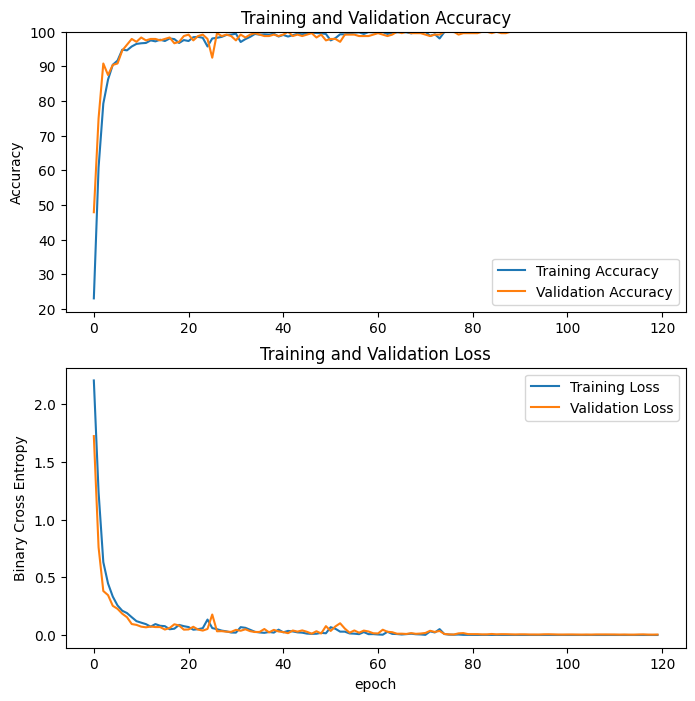

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),100])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Binary Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

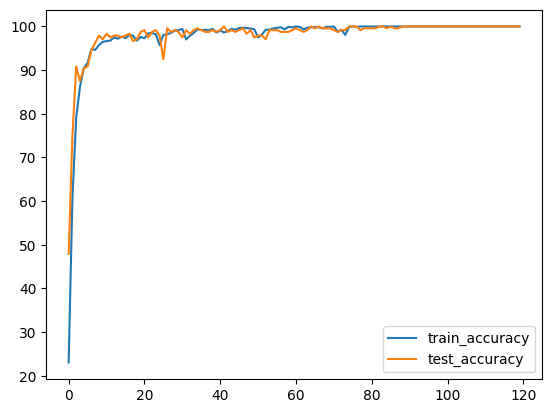

In [63]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(val_accuracies, label='test_accuracy')
plt.legend()

# 9. Test model

In [64]:
test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
print(f"test_loss : {test_loss}, test_accuracy : {test_accuracy} ")

test_loss : 0.04559979564146488, test_accuracy : 99.72222222222223 


In [67]:
# Load model đã trace
model = torch.jit.load("D:/install/AI/Code/Project/GRU_MODEL/gru.pt", map_location=device)
model.eval()  # Đặt chế độ eval để inference

print("Model loaded and ready for inference.")
test_loss, test_accuracy = evaluate(model, test_loader, criterion,device)
print(f"test_loss : {test_loss}, test_accuracy : {test_accuracy} ")

Model loaded and ready for inference.
test_loss : 0.04559979564146488, test_accuracy : 99.72222222222223 


# 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

In [ ]:
y_hat = model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(y_test, axis=1)


# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)
# Tính Area under ROC
auc = roc_auc_score(y_test, y_hat, multi_class='ovr')
print('ROC AUC: %f' % auc)
# Tính confusion matrix
matrix = confusion_matrix(y_test_label, y_pred)
print(matrix)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = np.repeat(np.arange(0,10),15)
class_names = np.array(['aw', 'ee', 'ow', 'sac', 'hoi','nang','nothing','aa','oo','uw','nga','huyen'])

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as pyplot
class_names = np.array(['aw', 'ee', 'ow', 'sac', 'hoi','nang','nothing','aa','oo','uw','nga','huyen'])
df_cm = pd.DataFrame(matrix, index = [i for i in class_names],
                  columns = [i for i in class_names])
pyplot.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cm, annot=True, cmap = plt.cm.Blues)
cfm_plot.figure.savefig("D:/install/AI/Code/Project/GRU_MODEL/save/cfm.png")

# 13. TEST REAL TIME


In [12]:
import cv2
import numpy as np
from collections import deque
import time
# from tensorflow.keras.models import load_model
from decimal import Decimal
import torch

# Danh sách tên class
class_names = ["aw","ee","ow","sac", "hoi","nang","nothing","aa","oo","uw", "nga","huyen"]
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Load mô hình
# Load model đã trace
model = torch.jit.load("D:/install/AI/Code/Project/GRU_MODEL/gru.pt", map_location=device)
model.eval()  # Đặt chế độ eval để inference


# Thông số đầu vào
SEQUENCE_LENGTH = 30
PREDICTION_THRESHOLD = 0.5  # Ngưỡng dự đoán 50%

# Mở webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("❌ Không thể mở webcam!")
    exit()

# Hàng đợi lưu trữ frames
frames_queue = deque(maxlen=SEQUENCE_LENGTH)

# Trạng thái của chương trình
state = "start"
start_time = time.time()
predicted_class = ""
prediction_score = 0.0
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("❌ Không thể đọc frame từ webcam!")
            break

        current_time = time.time()

        if state == "start":
            # 🟢 Hiển thị thông báo thu thập trong 2 giây
            if current_time - start_time < 2:
                cv2.putText(frame, "STARTING COLLECTION", (50, 100),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3, cv2.LINE_AA)
            else:
                state = "collect"
                frames_queue.clear()  # Xóa dữ liệu cũ

        elif state == "collect":
            # 🟡 Thu thập SEQUENCE_LENGTH frames
        
            frame, results = mediapipe_detection(frame, holistic)

            # Draw landmarks
            draw_styled_landmarks(frame, results)

            # 2. Prediction logic
            keypoints = extract_keypoints(results)
            frames_queue.append(keypoints)
            # count.append(keypoints)
            # frames_queue.append(frame_resized)

            cv2.putText(frame, f"Collecting: {len(frames_queue)}/{SEQUENCE_LENGTH}", (30, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

            if len(frames_queue) == SEQUENCE_LENGTH:
                state = "predict"

        elif state == "predict":
            # 🔴 Dự đoán
            sequence_tensor = np.expand_dims(frames_queue, axis=0)  # Thêm chiều batch
            sequence_tensor = torch.tensor(sequence_tensor, dtype=torch.float32).to(device)
            with torch.no_grad():
    # Dự đoán
                        res_tensor = model(sequence_tensor)  # Gọi mô hình trực tiếp
                        res = torch.softmax(res_tensor[0], dim=-1).cpu().numpy()  # Chuyển logits thành xác suất
                        predicted_index = np.argmax(res)
                        prediction_score = res[predicted_index]
                        print(prediction_score)

            if prediction_score >= PREDICTION_THRESHOLD:
                predicted_class = class_names[predicted_index] if predicted_index < len(class_names) else "Không xác định"
            else:
                predicted_class = "Không xác định"

            start_time = current_time  # Cập nhật thời gian để hiển thị kết quả
            state = "show_result"

        elif state == "show_result":
            # 🟠 Hiển thị kết quả trong 2 giây nếu độ tin cậy >= ngưỡng
            if prediction_score >= PREDICTION_THRESHOLD:
                cv2.putText(frame, f"Class: {predicted_class}", (30, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.putText(frame, f"Score: {round(Decimal(prediction_score * 100), 2)}%", (30, 100),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(frame, "Prediction confidence below threshold", (30, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

            if current_time - start_time >= 2:
                state = "start"  # Quay lại thu thập

        # Hiển thị khung hình
        cv2.imshow("Real-time Testing", frame)

        # Nhấn 'q' để thoát
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # 🔹 Giải phóng tài nguyên
    cap.release()
    cv2.destroyAllWindows()
    print("✅ Đã đóng webcam và cửa sổ hiển thị.")


0.9965185
0.78985006
0.5814126
0.81274796
0.99928683
0.9988716
0.98646194
0.5267055
0.99999714
0.79166317
0.35487568
0.8450129
0.9965379
0.99857783
0.9957794
0.99999714
0.99999714
0.99999714
0.99999714
✅ Đã đóng webcam và cửa sổ hiển thị.


In [8]:
cap.release()
cv2.destroyAllWindows()